# # # Machine Learning / Artificial Intelligence Tech Lead Interview

Welcome to Bold Commerce! For this interview we'll jump right into a problem and try to solve it together using whichever tools you believe are most appropriate for the task.

# ## Problem Statement

Suppose that we have a fairly new application being developed here at Bold Commerce. This new app is simply a mobile application that tracks the all of the users activity such as browsing and shopping activity.

The app development team has asked you to take some data from the app and extract some meaning from it. They were also interested in trying to possibly predict user behavior based on the usage data in the data they provided. For any given user, they want to see if they can use a snapshot of what that person has done at this particular time and predict what they are doing.



In this notebook, we would like to see how you would approach solving this problem. The data is provided in the `data` directory as `train.csv` and `test.csv`, so do what you will with this dataset to address the request of the app development team. Good luck and have fun!

# Environment Setup

In [119]:
# standard packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# feel free to add any additional packages you feel you may need
#from sklearn import ...
#import tensorflow as tf ...
# Load libraries


In [120]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# QUESTION

- What are some considerations for the nature of the dataset that you can initially explore?
- Can you show what you would like to explore regarding the dataset as presented?

I will first see the how my data looks like using .head().I found a column mentionaing the ID and 561 features. In the later part, 'activity. I'm taking it as a classifier target variable.'I found that Then I checked for the nulls values . I did not found single null value. This is a good sign. Using the .dtypes , I checked the columns datatypes.

In [121]:
#code
train_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,3368.0,0.283,-0.026,-0.111,-0.374,-0.100,-0.203,-0.376,-0.150,-0.182,...,0.515,0.275,-0.220,0.670,0.889,0.464,-0.760,0.140,0.186,1.0
1,3369.0,0.207,-0.017,-0.094,-0.325,-0.124,-0.217,-0.333,-0.174,-0.204,...,0.362,0.016,0.945,0.602,0.807,-0.112,-0.762,0.142,0.184,1.0
2,3370.0,0.205,-0.016,-0.090,-0.335,-0.098,-0.219,-0.344,-0.149,-0.199,...,0.650,0.524,0.916,0.195,0.812,-0.262,-0.759,0.142,0.186,1.0
3,3371.0,0.241,-0.031,-0.106,-0.326,-0.066,-0.199,-0.333,-0.106,-0.166,...,0.364,0.149,0.468,-0.686,0.432,-0.366,-0.757,0.142,0.187,1.0
4,3372.0,0.270,-0.014,-0.100,-0.309,-0.017,-0.161,-0.314,-0.053,-0.117,...,0.258,-0.081,0.441,-0.794,0.709,-0.169,-0.749,0.145,0.192,1.0


In [122]:
test_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_552,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561
0,1.0,0.289,-0.020,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,...,-0.074,-0.299,-0.710,-0.113,0.030,-0.465,-0.018,-0.841,0.180,-0.059
1,2.0,0.278,-0.016,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,...,0.158,-0.595,-0.861,0.053,-0.007,-0.733,0.704,-0.845,0.180,-0.054
2,3.0,0.280,-0.019,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.415,-0.391,-0.760,-0.119,0.178,0.101,0.809,-0.849,0.181,-0.049
3,4.0,0.279,-0.026,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,...,0.405,-0.117,-0.483,-0.037,-0.013,0.640,-0.485,-0.849,0.182,-0.048
4,5.0,0.277,-0.017,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.088,-0.351,-0.699,0.123,0.123,0.694,-0.616,-0.848,0.185,-0.044


In [125]:
train_data.shape

(3675, 563)

In [126]:
print(train_data.isnull().sum())

ID             0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
              ..
feature_533    0
feature_534    0
feature_535    0
feature_536    0
feature_537    0
feature_538    0
feature_539    0
feature_540    0
feature_541    0
feature_542    0
feature_543    0
feature_544    0
feature_545    0
feature_546    0
feature_547    0
feature_548    0
feature_549    0
feature_550    0
feature_551    0
feature_552    0
feature_553    0
feature_554    0
feature_555    0
feature_556    0
feature_557    0
feature_558    0
feature_559    0
feature_560   

In [127]:
train_data.dtypes

ID             float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
                ...   
feature_533    float64
feature_534    float64
feature_535    float64
feature_536    float64
feature_537    float64
feature_538    float64
feature_539    float64
feature_540    float64
feature_541    float64
feature_542    float64
feature_543    float64
feature_544    float64
feature_545

In [128]:
# Statistical Summary
from pandas import read_csv
from pandas import set_option
filename = "train_data.csv"
set_option('display.width', 100)
set_option('precision', 3)
description = train_data.drop('ID', axis = 1).describe()
print(description)

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
count   3675.000   3675.000   3675.000   3675.000   3675.000   3675.000   3675.000   3675.000   
mean       0.275     -0.018     -0.110     -0.605     -0.527     -0.609     -0.630     -0.541   
std        0.067      0.049      0.064      0.452      0.486      0.406      0.429      0.472   
min       -0.504     -1.000     -0.926     -1.000     -1.000     -1.000     -1.000     -0.999   
25%        0.265     -0.025     -0.121     -0.993     -0.979     -0.981     -0.994     -0.979   
50%        0.277     -0.017     -0.109     -0.949     -0.858     -0.865     -0.953     -0.867   
75%        0.289     -0.012     -0.099     -0.231     -0.074     -0.257     -0.284     -0.107   
max        1.000      1.000      1.000      1.000      0.916      0.730      1.000      0.968   

       feature_9  feature_10  ...  feature_553  feature_554  feature_555  feature_556  \
count   3675.000    3675.000  ...    

In [129]:
class_counts = train_data.groupby('activity').size()
print(class_counts)

activity
1.0    613
2.0    536
3.0    493
4.0    643
5.0    687
6.0    703
dtype: int64


In [130]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = train_data.drop('ID', axis = 1).corr(method='pearson')
print(correlations)

             feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
feature_1    1.000e+00  2.780e-01     -0.361      0.009     -0.018     -0.036      0.015   
feature_2    2.780e-01  1.000e+00     -0.172     -0.041     -0.035     -0.048     -0.040   
feature_3   -3.615e-01 -1.716e-01      1.000     -0.031     -0.035     -0.012     -0.030   
feature_4    9.292e-03 -4.065e-02     -0.031      1.000      0.944      0.885      0.998   
feature_5   -1.816e-02 -3.531e-02     -0.035      0.944      1.000      0.923      0.939   
feature_6   -3.645e-02 -4.849e-02     -0.012      0.885      0.923      1.000      0.874   
feature_7    1.484e-02 -4.000e-02     -0.030      0.998      0.939      0.874      1.000   
feature_8   -1.955e-02 -3.519e-02     -0.035      0.937      0.997      0.917      0.932   
feature_9   -4.010e-02 -5.079e-02     -0.003      0.873      0.917      0.997      0.862   
feature_10   4.253e-02 -2.672e-02     -0.048      0.979      0.932      0.893   

In [131]:
skew = train_data.skew()
print(skew)

ID            -0.027
feature_1     -1.508
feature_2      0.041
feature_3      2.787
feature_4      0.703
feature_5      0.394
feature_6      0.529
feature_7      0.777
feature_8      0.424
feature_9      0.520
feature_10     0.607
feature_11     0.516
feature_12     0.772
feature_13    -0.627
feature_14    -0.650
feature_15    -0.957
feature_16     0.453
feature_17     1.917
feature_18     3.043
feature_19     1.899
feature_20     1.005
feature_21     0.571
feature_22     0.617
feature_23    -0.011
feature_24    -0.066
feature_25     0.006
feature_26     0.083
feature_27     0.457
feature_28    -0.281
feature_29    -0.074
               ...  
feature_533    3.054
feature_534    1.082
feature_535    2.818
feature_536    1.121
feature_537    0.006
feature_538    2.094
feature_539    0.152
feature_540    0.758
feature_541    1.429
feature_542    1.823
feature_543    2.114
feature_544    2.053
feature_545    2.071
feature_546    2.557
feature_547    1.823
feature_548    5.281
feature_549  

# QUESTION
What algorithms would be appropriate for the provided problem and why?

In [132]:
#Finding the coorelation 
train_data[train_data.columns[1:]].corr()['activity'][:].sort_values()

feature_105   -0.867
feature_103   -0.862
feature_104   -0.856
feature_368   -0.853
feature_235   -0.851
feature_185   -0.849
feature_367   -0.847
feature_369   -0.842
feature_289   -0.839
feature_290   -0.835
feature_429   -0.832
feature_126   -0.832
feature_448   -0.832
feature_524   -0.830
feature_129   -0.826
feature_288   -0.825
feature_432   -0.825
feature_261   -0.817
feature_550   -0.815
feature_88    -0.815
feature_447   -0.814
feature_273   -0.813
feature_349   -0.812
feature_426   -0.810
feature_101   -0.810
feature_85    -0.809
feature_267   -0.809
feature_435   -0.808
feature_5     -0.808
feature_352   -0.808
               ...  
feature_52     0.553
feature_43     0.557
feature_55     0.558
feature_375    0.561
feature_34     0.586
feature_59     0.598
feature_114    0.600
feature_174    0.603
feature_26     0.604
feature_156    0.623
feature_559    0.627
feature_373    0.633
feature_106    0.633
feature_54     0.643
feature_51     0.646
feature_42     0.646
feature_133  

In [133]:
#CODE
#Transforming out train and test data according to our need!
train_data1=train_data[['ID','feature_10','feature_103','feature_104','feature_368','feature_235','feature_185'
                      ,'feature_367' ,'feature_369','feature_289','feature_290','feature_429','feature_126'
                      ,'feature_448','feature_524','feature_129','feature_288','feature_432','feature_261'
                      ,'feature_550','feature_88','feature_447','feature_273','feature_349','feature_426'
                      ,'feature_101','feature_85','feature_267','feature_435','feature_5','feature_352'
                      ,'feature_52','feature_43','feature_55','feature_375','feature_34','feature_59','feature_114'    
                      ,'feature_174','feature_26','feature_156','feature_559','feature_373'    
                      ,'feature_106','feature_54','feature_51', 'feature_42','feature_133','feature_154',
                      'feature_134','feature_194' ,'feature_173','feature_175','feature_95',  
                      'feature_15','feature_13' ,'feature_14' ,'feature_94','feature_93',
                       'feature_135','activity']]
test_data1=test_data[['ID','feature_10','feature_103','feature_104','feature_368','feature_235','feature_185'
                      ,'feature_367' ,'feature_369','feature_289','feature_290','feature_429','feature_126'
                      ,'feature_448','feature_524','feature_129','feature_288','feature_432','feature_261'
                      ,'feature_550','feature_88','feature_447','feature_273','feature_349','feature_426'
                      ,'feature_101','feature_85','feature_267','feature_435','feature_5','feature_352'
                      ,'feature_52','feature_43','feature_55','feature_375','feature_34','feature_59','feature_114'    
                      ,'feature_174','feature_26','feature_156','feature_559','feature_373'    
                      ,'feature_106','feature_54','feature_51', 'feature_42','feature_133','feature_154',
                      'feature_134','feature_194' ,'feature_173','feature_175','feature_95',  
                      'feature_15','feature_13' ,'feature_14' ,'feature_94','feature_93',
                       'feature_135']]



# QUESTION

- What results can be drawn from your exploration and modelling process?
- What is your ultimate choice with regard to final model and why?

In [135]:
# code
from sklearn.model_selection import train_test_split

predictors=train_data1.drop(['ID','activity'],axis=1)
target=train_data1['activity']
seed = 6
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.27,random_state=seed)

In [136]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_cv)
acc_knn = round(accuracy_score(y_pred,y_cv) * 100, 2)
print(acc_knn)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

96.27
confusion matrix:
[[171   3   3   0   0   0]
 [  0 144   1   0   0   0]
 [  1   1 120   0   0   0]
 [  0   0   0 151   5   0]
 [  0   0   0  23 174   0]
 [  0   0   0   0   0 196]]


In [137]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_cv)
acc_svc = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_svc)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

C:\Users\hamroun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


93.66
confusion matrix:
[[169   7   4   0   0   0]
 [  1 139   2   0   0   0]
 [  2   2 118   0   0   0]
 [  0   0   0 132   3   0]
 [  0   0   0  42 176   0]
 [  0   0   0   0   0 196]]


In [138]:
#NaiveBaiyes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_cv)
acc_nb = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_nb)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

75.93
confusion matrix:
[[123  19  15   0   0   0]
 [ 26 117  13   0   1   0]
 [ 23  12  96   0   0   0]
 [  0   0   0 149 105   0]
 [  0   0   0  21  73   0]
 [  0   0   0   4   0 196]]


In [139]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_cv)
acc_dtc = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_dtc)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

95.27
confusion matrix:
[[160   7  10   0   0   0]
 [  8 137   4   0   0   0]
 [  4   2 110   0   0   0]
 [  0   0   0 169   5   0]
 [  0   2   0   5 174   0]
 [  0   0   0   0   0 196]]


In [140]:
#LR
from sklearn.linear_model import LogisticRegression
lrc= LogisticRegression()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_cv)
acc_lr = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_lr)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

95.77
confusion matrix:
[[160   2  12   0   0   0]
 [  6 142   2   0   1   0]
 [  6   4 110   0   0   0]
 [  0   0   0 170   5   0]
 [  0   0   0   4 173   0]
 [  0   0   0   0   0 196]]


In [141]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldac= LinearDiscriminantAnalysis()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_cv)
acc_lda = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_lda)
#confusion matrix: 
matrix = confusion_matrix(y_pred, y_cv)
print("confusion matrix:")
print(matrix)

95.97
confusion matrix:
[[162   2  11   0   0   0]
 [  6 142   2   0   1   0]
 [  4   4 111   0   0   0]
 [  0   0   0 170   6   0]
 [  0   0   0   4 172   0]
 [  0   0   0   0   0 196]]


In [142]:
models = pd.DataFrame({
    'Method': ['KNN', 'SVM', 
              'NaiveBayes', 'Decision Tree', 'LogisticRegression', 'LinearDiscriminantAnalysis'],
    'Score': [acc_knn, acc_svc, 
              acc_nb, acc_dtc, acc_lr, acc_lda]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,KNN,96.27
5,LinearDiscriminantAnalysis,95.97
4,LogisticRegression,95.77
3,Decision Tree,95.27
1,SVM,93.66
2,NaiveBayes,75.93


# QUESTION

- How would you deploy the chosen algorithm? What were your considerations in making this decision?

In [143]:
# code
from sklearn.model_selection import cross_val_score
myList=list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

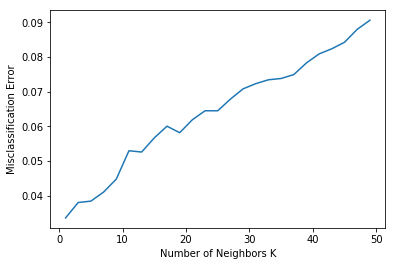

In [144]:
#Checking for the best K.
index=list(range(1,50,2))
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# plot misclassification error vs k
plt.plot(index, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
#Selecting K=3 as it has lowest error.

In [145]:
#Applying KNN to the test set!
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(test_data1.drop('ID',axis=1))
print(y_pred)

[5. 5. 5. ... 6. 6. 6.]


# QUESTION

- What are your overall conclusions to the problem? What have you made available and how can we use what was built?

In [146]:
test_data['activity'] = y_pred

In [147]:
inaldf = pd.DataFrame(test_data)
inaldf.to_csv('predictions.csv', index=False, header=None)